<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicios de Regresión

Ejemplo de regresión utilizando el dataset recolecado de pesos y estaturas de personas<br>

[Dataset source](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights)

v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [20]:
if os.access('weight_height.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv > weight_height.csv
    else:
        !wget weight_height.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv

# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [21]:
df = pd.read_csv('weight_height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [43]:
desc_df = df.describe()

In [46]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
desc_df.loc['Nan'] = df.isna().sum()
desc_df.loc['Null'] = df.isnull().sum()
desc_df

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699
Nan,0.000000,0.000000
Null,0.000000,0.000000


In [47]:
# Alumno, en caso de encontrarse elementos faltantes,
# elimine aquellas filas que tengan columnas vacias
# Escriba el procedimiento tenga o no elementos faltantes
df_clean = df.copy()
df_clean.dropna(inplace=True)

In [48]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df_clean.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [49]:
df_clean.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [63]:
# Alumno: copie los datos a un nuevo dataset (df2), pero ahora transforme las columnas en 
# peso --> proveniente de Weight, debe pasar de libras a kilobramos
# altura --> proveniente de Height, debe pasar de pulgadas a metros
# sexo --> masculino (proveniente de Male) y femenino (proveniente de Female)
df2 = df_clean.copy()
KILOGRAM_EQUIVALENT = 0.45359237
METER_EQUIVALENT = 0.0254
df2['Weight'] = df2['Weight'] * KILOGRAM_EQUIVALENT
df2['Height'] = df2['Height'] * METER_EQUIVALENT

# Para reemplazar valores hay distintas formas de hacerlo, quise probar este porque nunca lo había usado y se asemeja a SQL, me pareció util. 
df2['Gender'] = np.where((df2.Gender == 'Male'),'Masculino',df2.Gender)
df2['Gender'] = np.where((df2.Gender == 'Female'),'Femenino',df2.Gender)
df_spanish = df2.rename(columns={'Gender':'sexo', 'Weight':'peso', 'Height':'altura'})
df_spanish['sexo'].unique()

array(['Masculino', 'Femenino'], dtype=object)

In [65]:
# Fin de la limpieza, alumno especifique cuantas filas se poseen para analizar

# Una forma:
#len(df_spanish)

# Otra forma:
df_spanish.shape[0]

10000

# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

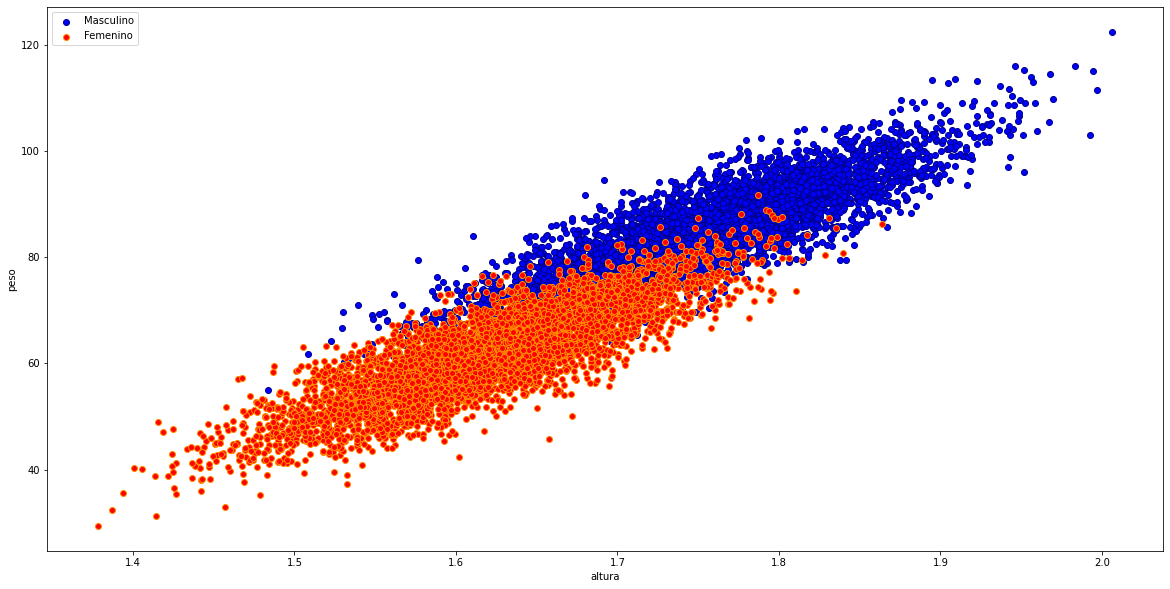

In [121]:
# Alumno graficar el peso (y) en función de la altura (x) pero para ambos sexos por separados
# Se debe realizar todo en un mismo "ax", cada scatter plot con diferente color para ver los dos grupos
df_male = df_spanish[df_spanish['sexo'] == 'Masculino']
df_female = df_spanish[df_spanish['sexo'] == 'Femenino']

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()
ax.scatter(x=df_male['altura'], y=df_male['peso'], color='b',edgecolors='darkBlue', label='Masculino')
ax.scatter(x=df_female['altura'], y=df_female['peso'], color='r',edgecolors='darkOrange', label='Femenino')
ax.legend()
ax.set_ylabel('peso')
ax.set_xlabel('altura')
plt.show()

Altura media en hombres:  1.7532691860179221


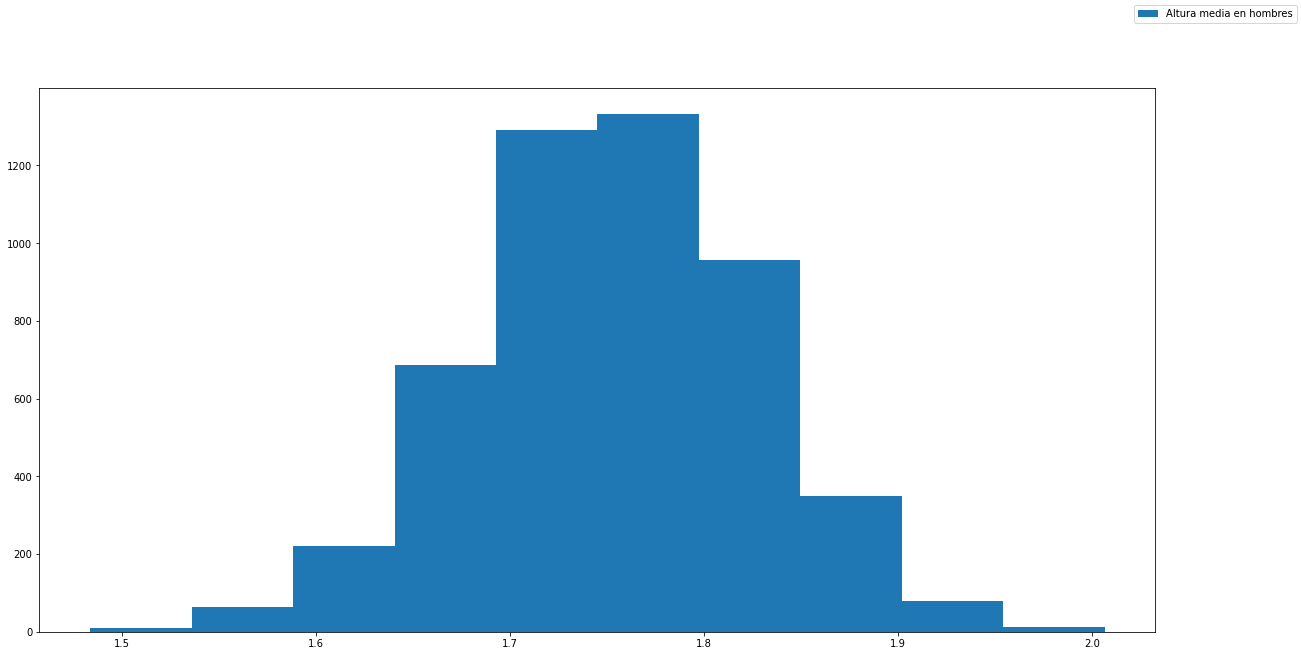

In [129]:
# Alumno: Dibujar la distribucion (histograma) de la altura en hombres
# Además, imprimir en pantalla el valor medio
print('Altura media en hombres: ', df_male['altura'].mean())
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()
ax.hist(df_male['altura'], label='Altura media en hombres')
fig.legend()

Altura media en mujeres:  1.6182028495269967


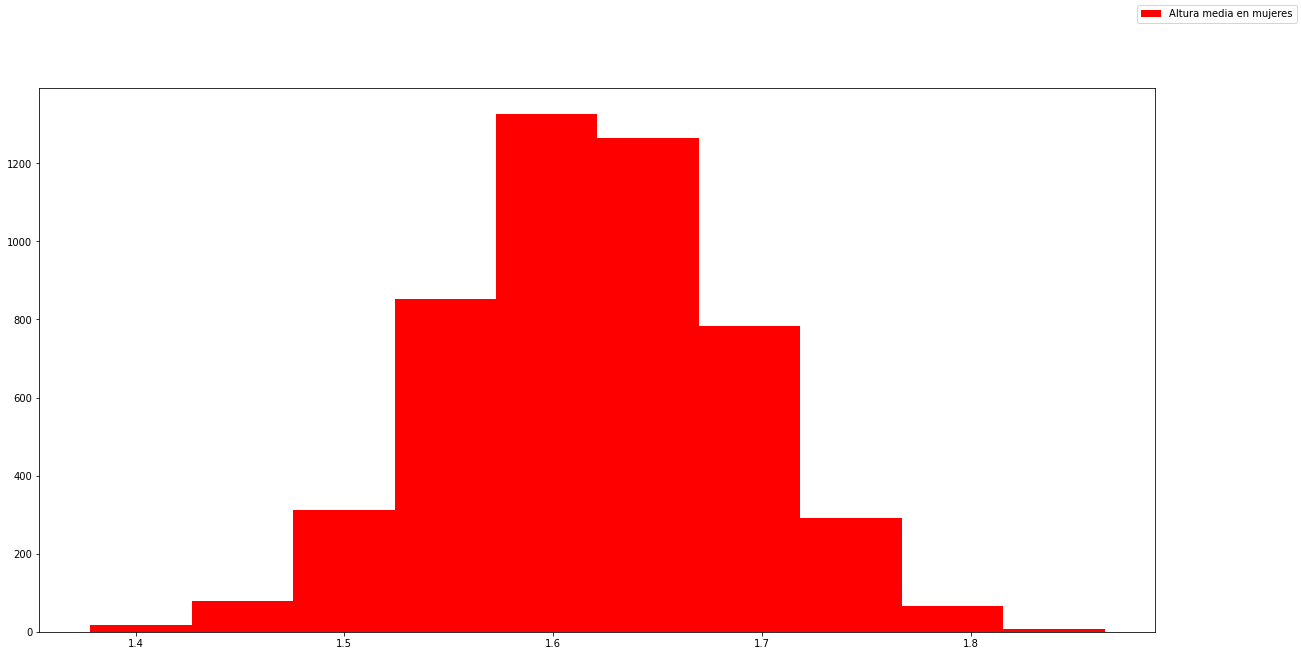

In [93]:
# Alumno: Dibujar la distribucion (histograma) de la altura en mujeres
# Además, imprimir en pantalla el valor medio
print('Altura media en mujeres: ', df_female['altura'].mean())
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()
ax.hist(df_female['altura'],color='r', label='Altura media en mujeres')
fig.legend()

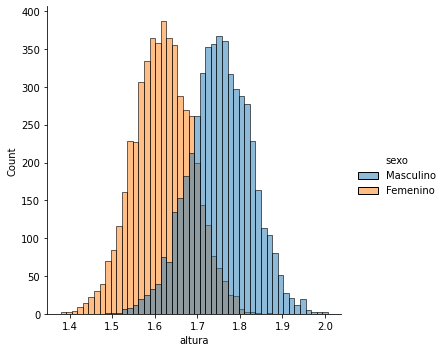

In [95]:
# Alumno: porque no prueba la función displot de seaborn que acepta
# "colorear" según la categoría deseada.
# Ingresar parámetros= data=df2, x="altura", hue="sexo"

sns.displot(data=df_spanish, x="altura", hue="sexo")

# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Alumno:<br>
Para esta regresión se utilizará como variable de entrada el peso (X) y como salida la altura (y). Crear el modelo de regresión lineal que sea de su agrado o invierta las variables de salida y entrada si así lo prefiere. Debe elegir trabajar con los datos de sexo masculino o femenino, o duplicar el trabajo y realizar ambos.<br>
Pasor a seguir:
- Obtener las variables X e y (para masculino y/o femenino)
- Dividir el dataset en train y test 70%30%
- Entrenar un modelo de regresión
- Calcular la métrica r2_score del modelo (y_hat vs y_test)
- Dibujar el resultado de la regresion sobre los datos de entrada


In [106]:
# Datos para Masculino:
Xm = df_male[['peso']].values
ym = df_male['altura'].values
# Datos para Femenino:
Xf = df_female[['peso']].values
yf = df_female['altura'].values

In [107]:
from sklearn.model_selection import train_test_split

Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, test_size=0.3, random_state=42)
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, test_size=0.3, random_state=42)

In [109]:
from sklearn import linear_model

# Masculino:
lr_m = linear_model.LinearRegression()
lr_m.fit(Xm_train, ym_train)
y_hat_m = lr_m.predict(Xm_test)

# Femenino:
lr_f = linear_model.LinearRegression()
lr_f.fit(Xf_train, yf_train)
y_hat_f = lr_f.predict(Xf_test)

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [112]:
from sklearn.metrics import r2_score

# Masculino:
value_m = r2_score(ym_test, y_hat_m)
print(f"Coeficiente de determinación (Masculino): {value_m:.2f}")

# Femenino:
value_f = r2_score(yf_test, y_hat_f)
print(f"Coeficiente de determinación (Femenino): {value_f:.2f}")


Coeficiente de determinación (Masculino): 0.75
Coeficiente de determinación (Femenino): 0.73


# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

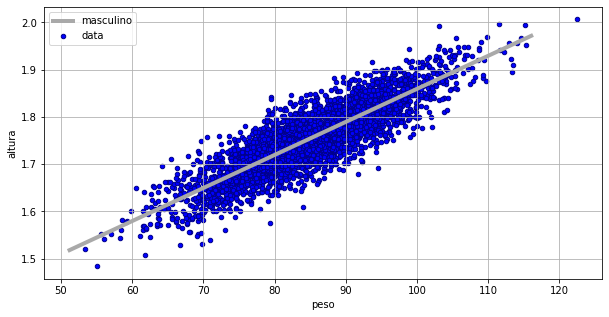

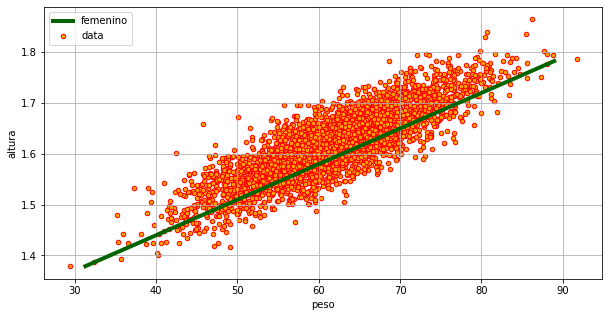

In [136]:
lx_m = sorted(Xm_test)
ly_m = lr_m.predict(lx_m)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()

ax.plot(lx_m, ly_m, label="masculino", color='darkGray', lw=4)
ax.scatter(Xm_train, ym_train, color='b', edgecolor='darkBlue', s=20, label="data")
ax.set_xlabel("peso")
ax.set_ylabel("altura")
ax.legend()
ax.grid('dashed')
plt.show()

lx_f = sorted(Xf_test)
ly_f = lr_m.predict(lx_f)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()

ax.plot(lx_f, ly_f, label="femenino", color='darkGreen', lw=4)
ax.scatter(Xf_train, yf_train,color='orange', edgecolor='red', s=20, label="data")
ax.set_xlabel("peso")
ax.set_ylabel("altura")
ax.legend()
ax.grid('dashed')
plt.show()